Text(0, 0.5, 'Loss')

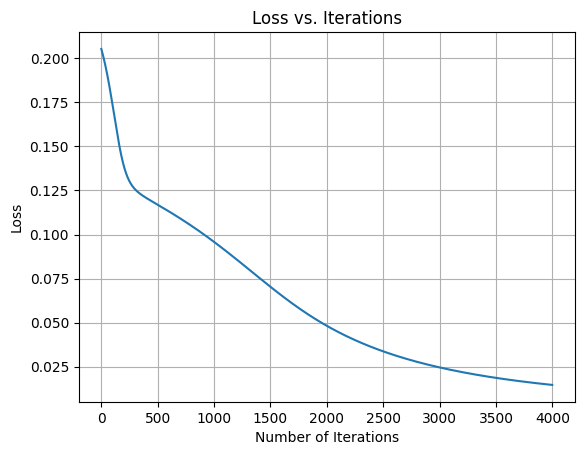

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

#Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#derivative of sigmoid, useful in backpropagation
def sigmoid_derivative(x):
    return np.exp(-x) / ((1 + np.exp(-x)) ** 2)

def forward_propagation(X,w1, w2,b1,b2):
    #Compute from layer 1 to layer L (L=2 here)
    #l=1
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)
    #l=2
    z2 = np.dot(a1, w2) + b2
    y_pred = a2 = sigmoid(z2) #y_pred is a2 (last layer activation) for this network
    return z1, a1, z2, y_pred

#Cost function
def compute_cost(y_pred):
    m = len(y_pred)
    C = 0.5 *(1/m) * sum((y - y_pred) ** 2)
    return C

def backward_propagation(X,w1,w2,b1,b2,y_pred, z2, a1, z1):
    m = X.shape[0] # This is used for (i) Cost derivation and (ii) in computing dC_db(s) so they are have the correct num of columns
    #Layer L to layer 1 (L=2 here)
    delta2 = np.multiply(-(y - y_pred)*(1/m), sigmoid_derivative(z2))
    dC_dw2 = np.dot(a1.T, delta2)
    dC_db2 = np.dot(delta2.T, np.ones(len(y_pred)))
    delta1 = np.dot(delta2, w2.T) * sigmoid_derivative(z1)
    dC_dw1 = np.dot(X.T, delta1)
    dC_db1 = np.dot(delta1.T, np.ones(len(y_pred)))
    return dC_dw1, dC_dw2, dC_db1, dC_db2

X = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])

y = np.array([[0], [1], [0], [1], [0], [1], [0], [1]])

input_no = 3
output_no = 1
hidden_no = 4

np.random.seed(42)
w1 = np.random.randn(input_no, hidden_no)
b1 = np.ones([1, hidden_no])

w2 = np.random.randn(hidden_no, output_no)
b2 = np.ones([1, output_no])

alpha = 0.05 #learning rate
num_iterations = 4000

cost =[]

#For simplicity the entire 8 rows are being used here
#In real world situations, m is always taken as fewer than total rows in the training set 
for i in range(num_iterations):
    z1, a1, z2, y_pred = forward_propagation(X,w1, w2,b1,b2)
    dC_dw1, dC_dw2, dC_db1, dC_db2 = backward_propagation(X,w1,w2,b1,b2,y_pred, z2, a1, z1)

    #New w2 and b2 for layer 2
    w2 = w2 - (alpha * dC_dw2)
    b2 = b2 - (alpha * dC_db2.reshape(1,-1))

    #New w2 and b2 for layer 1
    w1 = w1 - (alpha * dC_dw1)
    b1 = b1 - (alpha * dC_db1.reshape(1,-1))
    


    

    c = compute_cost(y_pred)
    cost.append(c)

plt.grid() 
plt.plot(range(num_iterations), cost)
plt.title('Loss vs. Iterations') 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss')

In [8]:
#Final parameters:
print("w2:",w2)
print("b2:",b2)
print("-----")
print("w1:",w1)
print("b1:",b1)


w2: [[ 0.81188389]
 [-2.64295186]
 [-3.10989983]
 [-0.22775115]]
b2: [[1.94261755]]
-----
w1: [[ 0.55662911 -0.14719311  0.28659535  1.48764531]
 [-0.10465757 -0.43867623  0.76514473  0.70422809]
 [ 0.27625268 -2.14078    -2.98148485 -0.71716502]]
b1: [[1.11000983 0.93815197 0.56063413 0.91004329]]


In [9]:
#Lets see the final y_pred
print("y_pred:",y_pred)

y_pred: [[0.18419603]
 [0.83240091]
 [0.14745051]
 [0.8158495 ]
 [0.17103704]
 [0.83023004]
 [0.14821991]
 [0.80612835]]


In [10]:
#Actual observed values
print("y:",y)

y: [[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]
